In [324]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix

from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [325]:
# astros2016 = pd.read_csv("data/HOU2016.csv")
astros2017 = pd.read_csv("data/HOU2017.csv")
# astros2018 = pd.read_csv("data/HOU2018.csv")
# astros2019 = pd.read_csv("data/HOU2019.csv")
yankees2017 = pd.read_csv("data/NYY2017.csv")
dodgers2017 = pd.read_csv("data/LAD2017.csv")
redsox2017 = pd.read_csv("data/BOS2017.csv")


In [326]:
def boolhome(df):
    df.dropna(axis="index", how="all", inplace=True, subset=['Gtm'])
    df.rename(columns={"Unnamed: 3":"Home"}, inplace=True)
    df.replace({"Home":{"@": False, np.nan: True}}, inplace=True)
    df.drop("Unnamed: 0", axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['GmeSc'] = df['Opp. Starter (GmeSc)'].apply(lambda x: x[-3:-1])
    df['SoAb'] = df['SO'] / df["AB"]
    df['BbAb'] = df['BB'] / df["AB"]
#     df['bbsum'] = df["BB"] + df['SO']
    #df['GmeSc'].apply(lambda x: x.astype(int))
    return df

In [327]:
astros2017df = boolhome(astros2017)

In [328]:
# astros2017df = boolhome(astros2017)
# astros2018df = boolhome(astros2018)
# astros2019df = boolhome(astros2019)
# astros2016df = boolhome(astros2016)
yankees2017df = boolhome(yankees2017)
dodgers2017df = boolhome(dodgers2017)
redsox2017df = boolhome(redsox2017)

In [329]:
columns = astros2017df.columns

In [330]:
# astros2017df['so/at'] = astros2017df['SO'] / astros2017df["AB"]
# astros2017df['bb/at'] = astros2017df['BB'] / astros2017df["AB"]
# astros2017df['bbsum'] = astros2017df["BB"] + astros2017df['SO']

In [331]:
#astros2017df.head()

In [332]:
#astros2017df.info

In [333]:
#astros2017df.head()

In [334]:
# astros2017df.dropna(axis="index", how="all", inplace=True)

In [335]:
#astros2017df.head()

In [336]:
#astros2017df.tail()

In [337]:
#astros2017df.describe()

In [338]:
#astros2017df.OBP
#yankees2017df.OBP

In [339]:
# #astros2017df.OBP.plot.line()
# #yankees2017df.OBP.plot.line()
# dodgers2017df.OBP.plot.line()
# #redsox2017df.OBP.plot.line();

In [340]:
#dodgers2017df.head(10)

# GROUPBY home/away

In [341]:
astros_home_gb = astros2017df.groupby("Home")
yankees_home_gb = yankees2017df.groupby("Home")
dodgers_home_gb = dodgers2017df.groupby("Home")
redsox_home_gb = redsox2017df.groupby("Home")

* ## OBP advantage

In [342]:
astros_home_obp = astros_home_gb.get_group(True).OBP
astros_away_obp = astros_home_gb.get_group(False).OBP

In [343]:
yankees_home_obp = yankees_home_gb.get_group(True).OBP
yankees_away_obp = yankees_home_gb.get_group(False).OBP

In [ ]:
dodgers_home_obp = yankees_home_gb.get_group(True).OBP
dodgers_away_obp = yankees_home_gb.get_group(False).OBP

In [ ]:
redsox_home_obp = yankees_home_gb.get_group(True).OBP
redsox_away_obp = yankees_home_gb.get_group(False).OBP

In [344]:
print(astros2017df.OBP.median())
print(yankees2017df.OBP.median())

0.34600000000000003
0.34


In [294]:
print(astros_home_obp.mean())
print(yankees_home_obp.mean())

0.3400370370370371
0.34225925925925904


In [295]:
print(astros_away_obp.mean())
print(yankees_away_obp.mean())

0.3463950617283951
0.3403950617283949


In [296]:
#home.get_group(True).OBP.plot.line()

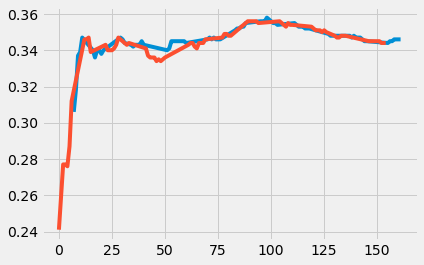

In [298]:
astros_away_obp.plot.line()
astros_home_obp.plot.line();

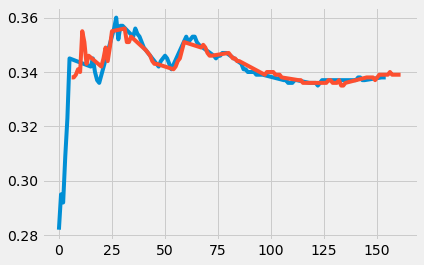

In [299]:
yankees_away_obp.plot.line()
yankees_home_obp.plot.line();

#### Is On Base Percentage (OBP) a rolling/weighted average? Can I parce HOME vs AWAY games? Should I consider a different stat like Strikeouts (SO)?

* ## SO advantage

In [193]:
astros_home_so = astros_home_gb.get_group(True).SO
astros_away_so = astros_home_gb.get_group(False).SO

In [249]:
yankees_home_so = yankees_home_gb.get_group(True).SO
yankees_away_so = yankees_home_gb.get_group(False).SO

In [253]:
astros_home_so_desc = astros_home_so.describe()

In [262]:
print(astros_home_so.mean())
print(yankees_home_so.mean())
print(abs(astros_home_so.mean() - yankees_home_so.mean()))

6.197530864197531
8.407407407407407
2.2098765432098757


In [323]:
# astros_home_so.plot.bar()
# yankees_home_so.plot.bar()
# abs(astros_home_so - yankees_home_so).plot.bar()

In [263]:
print(astros_away_so.mean())
print(yankees_away_so.mean())
print(abs(astros_away_so.mean() - yankees_home_so.mean()))

7.222222222222222
8.703703703703704
1.1851851851851842


* ## SS/AB

In [301]:
astros_home_SoAb = astros_home_gb.get_group(True).SoAb
astros_away_SoAb = astros_home_gb.get_group(False).SoAb

In [302]:
yankees_home_SoAb = yankees_home_gb.get_group(True).SoAb
yankees_away_SoAb = yankees_home_gb.get_group(False).SoAb

In [303]:
print(astros_home_SoAb.mean())
print(yankees_home_SoAb.mean())
print(abs(astros_home_SoAb.mean() - yankees_home_SoAb.mean()))

0.18812175291296823
0.2538940449109881
0.06577229199801987


In [312]:
print(astros_away_SoAb.mean())
print(yankees_away_SoAb.mean())
print(abs(astros_away_SoAb.mean() - yankees_home_SoAb.mean()))

0.20336894774961192
0.24466594275864456
0.05052509716137618


* ## BB/AB

In [313]:
astros_home_BbAb = astros_home_gb.get_group(True).BbAb
astros_away_BbAb = astros_home_gb.get_group(False).BbAb

In [314]:
yankees_home_BbAb = yankees_home_gb.get_group(True).BbAb
yankees_away_BbAb = yankees_home_gb.get_group(False).BbAb

In [315]:
print(astros_home_BbAb.mean())
print(yankees_home_BbAb.mean())
print(abs(astros_home_BbAb.mean() - yankees_home_BbAb.mean()))

0.08566245119553516
0.1162341190267757
0.030571667831240545


In [316]:
print(astros_away_BbAb.mean())
print(yankees_away_BbAb.mean())
print(abs(astros_away_BbAb.mean() - yankees_home_BbAb.mean()))

0.09646287836801411
0.10544476198569479
0.019771240658761596


In [190]:
astros_home_db_desc = astros_home_gb.describe()

In [191]:
astros_home_db_desc.columns

MultiIndex([('Gtm', 'count'),
            ('Gtm',  'mean'),
            ('Gtm',   'std'),
            ('Gtm',   'min'),
            ('Gtm',   '25%'),
            ('Gtm',   '50%'),
            ('Gtm',   '75%'),
            ('Gtm',   'max'),
            ( 'PA', 'count'),
            ( 'PA',  'mean'),
            ...
            ('LOB',   '75%'),
            ('LOB',   'max'),
            (  '#', 'count'),
            (  '#',  'mean'),
            (  '#',   'std'),
            (  '#',   'min'),
            (  '#',   '25%'),
            (  '#',   '50%'),
            (  '#',   '75%'),
            (  '#',   'max')],
           length=200)

* Baseball Reference uses MEDIAN over MEAN for all of its averages. Would using MEAN over MEDIAN effect outlieres that may be important for my test?
** it would because some games had unusually (exciting) scores. 